<a href="https://colab.research.google.com/github/v03012000/My_Face_Recognition/blob/master/Predicting_face_recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline
from fastai.vision import *
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning)


In [2]:
from google.colab import drive
drive.mount("/content/drive")

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [3]:
my_dir="/content/drive/My Drive/dl_projects/FaceRecognition"

In [4]:
predictor=load_learner(my_dir)

In [6]:
def my_predictor(im):
  test_img =open_image(im)
  pred_class,pred_idx,outputs=predictor.predict(test_img)
  return pred_class

In [7]:
import os
from PIL import Image
dirr='/content/'
os.makedirs("test",exist_ok=True)
os.makedirs("outputs",exist_ok=True)

In [8]:
import dlib
import cv2
import os
from imutils import face_utils
from PIL import Image
face_detector = dlib.get_frontal_face_detector()   
def face_finder(image_link):
  img=cv2.imread(image_link)
  frame = img
  gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
  rects = face_detector(gray,0)
  data=[]
  for rect in rects:
    (x1,y1,x2,y2) = face_utils.rect_to_bb(rect) 
    data.append([x1,y1,x2,y2])
  return face_cropper(image_link,data)
def face_cropper(image_link,rects):
  cropped_images=[]
  for rect in rects:
    my_image=Image.open(image_link)
    x1=rect[0]
    y1=rect[1]
    x2=rect[2]
    y2=rect[3]
    cropped_images.append(my_image.crop((x1,y1,x1+x2,y1+y2)))
  return cropped_images

In [19]:

%cd "/content/test"
from google.colab import files
my_file=files.upload()
%cd ..

/content/test


Saving 101de2ba-e295-4773-94f4-61eba2d533b8.jpg to 101de2ba-e295-4773-94f4-61eba2d533b8.jpg
/content


<Figure size 432x288 with 0 Axes>

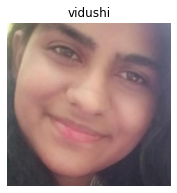

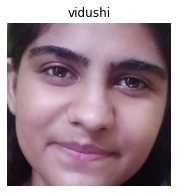

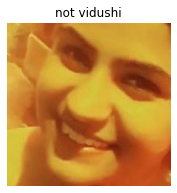

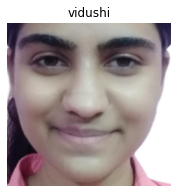

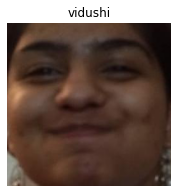

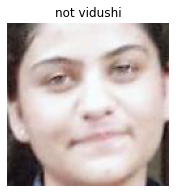

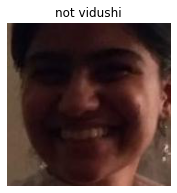

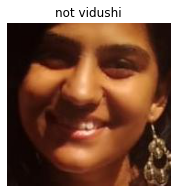

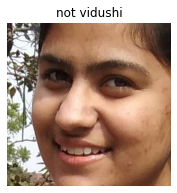

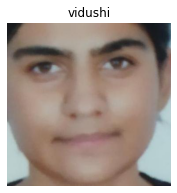

In [47]:
 
onlyfiles = next(os.walk('/content/test'))[2]
dirr='/content/test'
k=0
counter =0
for filename in onlyfiles:
  if (filename.endswith('.jpg')):
    path=os.path.join(dirr,filename)
    img=open_image(path)
    try:
      test_face=face_finder(path)
      test_face[0].save("testing"+str(k)+".jpg")
      name=my_image=open_image("testing"+str(k)+".jpg")
    except:
      pass
  if str(my_predictor("/content/testing"+str(k)+".jpg"))=='my_pictures_':
    t='vidushi'
  else:
    t='not vidushi'
  counter+=1
  plt.savefig("outputs/{}.jpg".format(counter))
  #name.save("outputs/{}.jpg".format(counter))
  name.show(title=t)
       
  k+=1
      
 


In [48]:
%cd "outputs"
!ffmpeg -framerate 2 -pattern_type glob -i '*.jpg' -s 1920x1080  \-c:v libx264 -r 1 -pix_fmt yuv420p ../my_faces_prediction_output.mp4
%cd ..

/content/outputs
ffmpeg version 3.4.8-0ubuntu0.2 Copyright (c) 2000-2020 the FFmpeg developers
  built with gcc 7 (Ubuntu 7.5.0-3ubuntu1~18.04)
  configuration: --prefix=/usr --extra-version=0ubuntu0.2 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --enable-gpl --disable-stripping --enable-avresample --enable-avisynth --enable-gnutls --enable-ladspa --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librubberband --enable-librsvg --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvorbis --enable-libvpx --enable-libwavpack --enable-libwebp --enable-libx265 --enable-libxml2 --enable-lib

In [45]:
!pip install -U kora
from kora.drive import upload_public

In [49]:
url = upload_public('my_faces_prediction_output.mp4')
print(url)

https://drive.google.com/uc?id=1etnHZnzORh5vvbEaXWVOveNWTrqXMqza


In [50]:
from IPython.display import HTML
HTML(f"""<video src={url} width=500 controls/>""")